Puntos 3D reconstruidos:
[[-2.9956873e-37  1.3853421e-05 -1.1371878e+04]
 [-1.1481552e+00  1.4994822e+00  7.3313108e-03]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+0

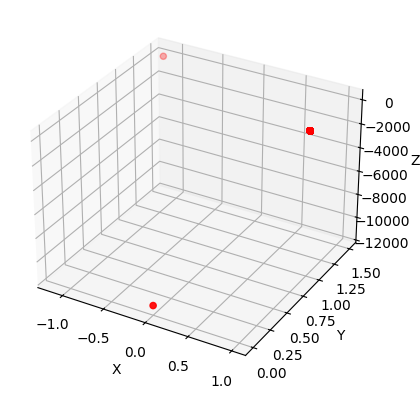

In [5]:
import cv2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Cargar las imágenes
img1 = cv2.imread('./taza_1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./taza_2.png', cv2.IMREAD_GRAYSCALE)

# Crear el detector ORB y el objeto BFMatcher
orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Detectar y computar descriptores
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Verificar que se detectaron descriptores en ambas imágenes
if des1 is None or des2 is None:
    raise ValueError("No se detectaron suficientes descriptores en una de las imágenes.")

# Encontrar coincidencias
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Verificar que haya suficientes coincidencias
if len(matches) < 8:  # Un mínimo arbitrario, puedes ajustarlo según tu necesidad
    raise ValueError("No se encontraron suficientes coincidencias entre las imágenes.")

# Extraer puntos de las coincidencias
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Verificar que los puntos tengan el mismo tamaño
assert pts1.shape == pts2.shape, "Los puntos no tienen el mismo tamaño."

# Parámetros de la cámara (matriz intrínseca K)
# Reemplaza estos valores con los parámetros reales de tu cámara
fx = 800  # Focal length in x axis
fy = 800  # Focal length in y axis
cx = 320  # Principal point x
cy = 240  # Principal point y

K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0, 0, 1]])

# Calcular la matriz esencial
E, mask = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)

# Recuperar la pose
_, R, t, mask = cv2.recoverPose(E, pts1, pts2, K, mask=mask)

# Filtrar los puntos usando la máscara
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

# Crear la matriz de proyección
P1 = np.hstack((np.eye(3, 3), np.zeros((3, 1))))
P2 = np.hstack((R, t))

# Triangular los puntos para obtener las coordenadas 3D
points4D = cv2.triangulatePoints(P1, P2, pts1.T, pts2.T)
points3D = points4D / points4D[3]  # Normalizar los puntos
points3D = points3D[:3].T  # Convertir a (N, 3)
points3D = np.squeeze(points3D)  # Eliminar dimensiones de tamaño 1

# Verificar la forma de points3D antes de la visualización
if points3D.shape[1] != 3:
    raise ValueError(f"La matriz de puntos 3D tiene una forma incorrecta: {points3D.shape}")

# Mostrar los puntos 3D
print("Puntos 3D reconstruidos:")
print(points3D)

# Visualización simple de los puntos 3D usando Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points3D[:, 0], points3D[:, 1], points3D[:, 2], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

pip install numpy opencv-python opencv-python-headless torch torchvision


c:\Users\usuario\anaconda3\envs\env_ai\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usuario\anaconda3\envs\env_ai\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\usuario/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:09<00:00, 11.1MB/s]


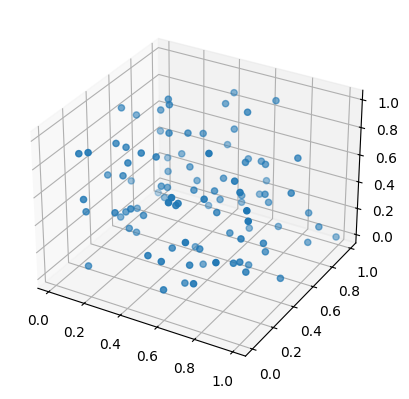

In [6]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función para cargar y preprocesar las imágenes
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image)
    return image

# Ruta de las imágenes
image_paths = ['taza_1.png', 'taza_2.png', 'taza_3.png', 'taza_4.png']

# Cargar y preprocesar las imágenes
images = [load_and_preprocess_image(img_path) for img_path in image_paths]
images = torch.stack(images)

# Cargar un modelo preentrenado (por ejemplo, resnet50)
model = resnet50(pretrained=True)
model.eval()

# Pasar las imágenes por el modelo (esto es un ejemplo, tu modelo puede variar)
with torch.no_grad():
    features = model(images)

# Aquí deberías implementar la lógica para reconstruir el objeto 3D a partir de las características extraídas
# Esto es un placeholder y necesitará un modelo de reconstrucción 3D específico
# Reconstrucción 3D ficticia para propósitos ilustrativos
reconstructed_3d = np.random.rand(100, 3)

# Visualizar la reconstrucción 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed_3d[:, 0], reconstructed_3d[:, 1], reconstructed_3d[:, 2])
plt.show()

Para una solución completa, deberías investigar sobre modelos de reconstrucción 3D basados en redes neuronales y técnicas como Structure from Motion (SfM) o Multi-View Stereo (MVS).